In [2]:
import os
import gzip
import shutil
import json
import pandas as pd
import _pickle as pickle
import numpy as np
%matplotlib inline

In [3]:
csv_path = '/Users/wang/data/OpenAPS/aps_demo.csv'

pd_demos = pd.read_csv(csv_path)


In [4]:
pd_demos.columns
pd_demos['time_stamp'] = pd.to_datetime(pd_demos.time_stamp)
pd_demos['date_born'] = pd.to_datetime(pd_demos.date_born)
pd_demos['age'] =  (pd_demos['time_stamp']  - pd_demos['date_born'])/ np.timedelta64(1, 'Y')
pd_demos['age'] = pd_demos['age'].apply(np.round)

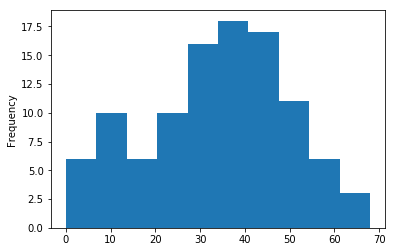

In [5]:
pd_demos['age'].plot.hist()

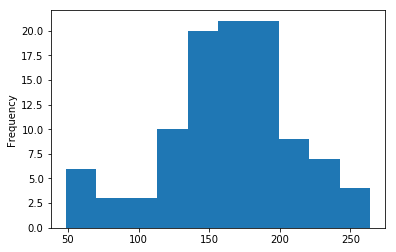

In [5]:
pd_demos['weight'].plot.hist()

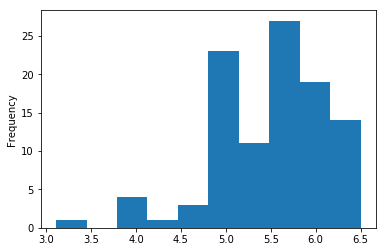

In [6]:
pd_demos['height'].plot.hist()

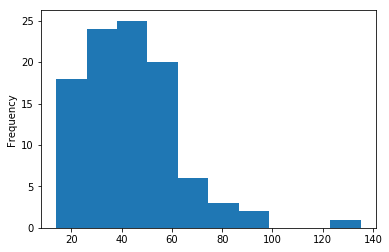

In [7]:
pd_demos['insulin_units_per_day'].plot.hist()

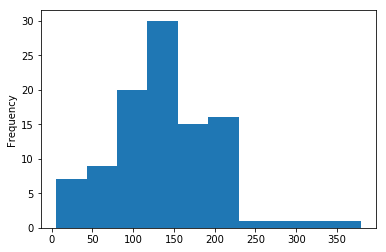

In [8]:
pd_demos['carb_grams_per_day'].plot.hist()

In [9]:
pids = ['27700103', '96254963', '57176789', '20396154', '00897741',
       '66836068', '66019205', '95851255', '97417885', '20216809',
       '47750728', '60844515', '37764532', '43589707', '14092221',
       '96805916', '95614431', '21946407', '37948668', '25692073',
       '99848889', '15634563', '80796147']

pd_demos[pd_demos['pid'].isin(pids)]

,time_stamp,pid,diag_date,insulin_pump_start_date,cgm_start_date,loop_start_date,date_born,country,weight,height,insulin_units_per_day,basal_insulin_per_day,carb_grams_per_day,a1c,a1c_date,ethnic,gender,age
3,2017-01-26 22:31:04,14092221,01/05/2006,08/08/2016,12/05/2016,11/11/2016,2006-04-09,Canada,75.0,4.90,24.275,11.100,161.0,6.2,09/01/2017,White,NaN,11.0
4,2017-01-27 14:08:59,15634563,15/02/1988,01/04/2004,01/12/2014,24/11/2016,1974-09-07,United Kingdom,215.0,6.00,45.800,28.850,170.0,46,06/01/2017,White,NaN,42.0
7,2017-02-12 22:39:30,897741,06/07/1992,NaN,12/07/2009,25/07/2016,1980-10-23,United States,149.0,5.50,25.490,13.980,132.0,6,12/12/2016,White,NaN,36.0
19,2017-06-09 12:04:10,43589707,01/08/1992,01/08/1997,01/05/2014,20/11/2016,1985-03-20,USA,185.0,5.10,50.000,22.500,104.0,7.7,24/02/2017,White,NaN,32.0
30,2017-09-19 15:36:12,47750728,01/03/1997,01/03/2002,01/03/2008,16/03/2017,1961-03-24,USA,139.0,5.60,35.550,15.825,162.0,5.6,28/07/2017,White,NaN,56.0
31,2017-09-25 20:47:52,96805916,29/05/2014,23/02/2015,16/12/2014,10/08/2017,2009-05-05,United States,62.0,4.30,17.800,10.025,73.0,7.5,12/07/2017,White,NaN,8.0
35,2017-10-12 23:10:13,25692073,10/01/2017,03/04/2017,01/07/2016,20/04/2017,1984-01-01,germany,242.5,6.20,75.000,25.000,165.0,7,05/10/2017,White,NaN,34.0
41,2017-11-13 06:57:44,99848889,01/03/1966,01/02/2001,01/01/2013,05/01/2017,1962-10-08,Canada,175.0,5.11,33.125,13.350,90.0,6.8,28/08/2017,"1/2 Spanish, 1/4 German, 1/4 Prussian",NaN,55.0
42,2017-11-19 13:45:46,66019205,04/05/1984,10/11/1995,05/04/2005,09/10/2017,2017-08-17,USA,133.0,5.20,36.530,21.090,89.0,7.8,24/07/2017,White,NaN,0.0
43,2017-11-24 17:00:39,21946407,23/03/2005,01/01/2007,01/06/2017,01/08/2017,1993-01-30,Canada,190.0,5.11,56.000,21.250,147.0,7,14/09/2017,Israeli,NaN,25.0
